## Escuela de Ingeniería en Computación, ITCR 

## Aprendizaje automático

 
### Segunda tarea programada, julio 2023


Profesora: María Auxiliadora Mora

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: Individual o en grupos de máximo dos personas.

---


Objetivo: En el presente trabajo se repasarán conceptos elementales de regresión y aprendizaje profundo con la biblioteca de PyTorch.


**Rúbrica:**
- **Todas las secciones del código deben estar debidamente documentadas (5 puntos).**
- **Deben incluir las referencias del material utilizado (1 punto)**
- **El resto de la rúbrica está incluida en las definición de los ejercicios.**

---


## Pregunta 1. Análisis de regresión con aprendizaje profundo (con PyTorch)

Para realizar el análisis se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset.   

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. Comúnmente, la edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscopio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

Dado el conjunto de datos de abulones se **desea crear un modelo de regresión utilizando un perceptrón multicapa para predecir la cantidad de anillos (columna Rings) de estos a partir del conjunto de características**.

Realice lo siguiente:

**(Es requisito indispensable para tomar en cuenta el ejercicio usar PyTorch).**

- a) (1 punto) Describa el conjunto de datos, cada uno de sus campos y referencie la fuente. 
- b) Cargue el conjunto de datos.
- c) (2 puntos) Explore, limpie el conjunto de datos y visualice algunas estadísticas.
- d) (1 puntos) Escale los datos datos.
- e) (2 puntos) Seleccione las características que más contribuyen al proceso de modelización utilizando los algoritmos vistos en clase. Explique los resultados.
- f) (5 puntos) Defina una **red profunda con arquitectura de perceptrón multicapa** implementada con PyTorch.
- g) (3 puntos) Intancie un modelo y realice el entrenamiento de este.
- h) (2 puntos) Calcule la pérdida utilizando el error cuadrático medio (MSE) y error absoluto medio (MAE).
- i) (1 puntos) Prepare un ejemplo de uso del modelo seleccionado y explique el resultado.
- j) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.


#### 1.1 Descripcion del conjunto de datos

El conjunto de datos se refiere a caracteristicas de abulones, los cuales son moluscos que se encuentran en las costas de Nueva Zelanda, Australia, Sudáfrica y Japón. Estos moluscos son muy apreciados por su carne y por su concha, la cual es utilizada para hacer joyas. A continuación se van a describir los campos de los datos:

1. Sex: Sexo del abulón. Puede ser masculino, femenino o infantil. Variable categórica nominal.
2. Length: Longitud del abulón en mm. Variable numérica continua.
3. Diameter: Diámetro del abulón en mm. Variable numérica continua.
4. Height: Altura del abulón en mm. Variable numérica continua.
5. Whole weight: Peso del abulón entero en gramos. Variable numérica continua.
6. Shucked weight: Peso de la carne del abulón en gramos. Variable numérica continua.
7. Viscera weight: Peso de las vísceras del abulón en gramos. Variable numérica continua.
8. Shell weight: Peso de la concha del abulón en gramos. Variable numérica continua.
9. Rings: Cantidad de anillos del abulón. Variable numérica discreta. Esta variable es la que se desea predecir. La cantidad de anillos + 1.5 es la edad del abulón en años.

#### 1.2 Carga de datos

Se procederá a cargar los datos con la libreria pandas.

In [44]:
import pandas as pd
import numpy as np

abalone_df = pd.read_csv('./datos/abalone.csv', header=0)

abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### 1.3 Exploración y limpieza de datos

El primer proceso de limpieza es volver los datos categoricos en numericos. 

Vamos a usar la libreria pandas para generar variables númericas.

In [45]:
abalone_df = pd.get_dummies(abalone_df, columns=['Sex'], prefix='')
abalone_df.columns = abalone_df.columns.str.replace('_','')
abalone_df = abalone_df.drop(['I'], axis=1)

abalone_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0


Vamos a usar una matriz de correlación para ver la relación entre las variables.

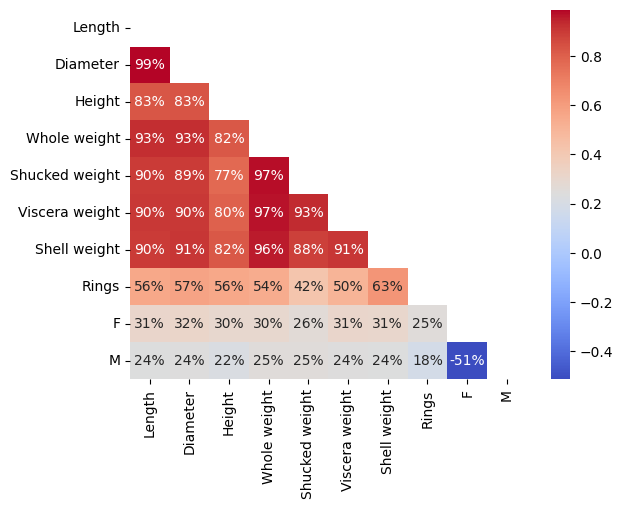

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = abalone_df.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, fmt=".0%", mask=mask, cmap='coolwarm')

# Display the plot
plt.show()

Como se puede ver, las variables con más correlación es Lenght y Diameter. Por lo que se van a usar estas dos variables para el modelo.


In [47]:
from sklearn.linear_model import LinearRegression

def plot_scatter_plot(x, y, x_label='X', y_label='Y', title='Scatter Plot'):

# Create a linear regression model
  model = LinearRegression()
  model.fit(x, y)

  # Predict the y-values based on the linear regression model
  y_pred = model.predict(x)

# Create scatter plot
  plt.scatter(x, y)

# Add best-fit line
  plt.plot(x, y_pred, color='red')

# Add labels and title
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

  plt.show()

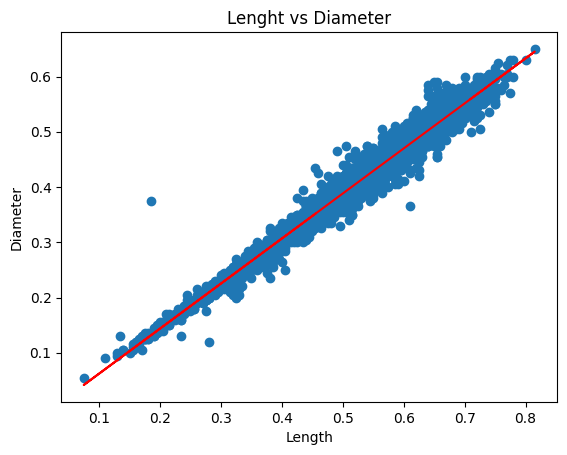

In [48]:
plot_scatter_plot(abalone_df['Length'].values.reshape(-1, 1), abalone_df['Diameter'].values.reshape(-1, 1), 'Length', 'Diameter', 'Lenght vs Diameter')

#### 1.4 Escalado de Datos

Se procederá a escalar los datos con la libreria sklearn.


In [49]:
from sklearn import preprocessing

scaled_df = pd.DataFrame(preprocessing.scale(abalone_df), columns = abalone_df.columns)

abalone_df.iloc[:, :] = scaled_df.values

abalone_df.std(axis=0)

Length            1.00012
Diameter          1.00012
Height            1.00012
Whole weight      1.00012
Shucked weight    1.00012
Viscera weight    1.00012
Shell weight      1.00012
Rings             1.00012
F                 1.00012
M                 1.00012
dtype: float64

#### 1.5 Selección de características
Como se vio en la seccion anteriormente, hay variables fuertemente correlacionadas. Para este caso, vamos a elmininar una de las variables fuertemente relacionadas. En este caso, se va a eliminar la variable Length.

In [50]:
abalone_df = abalone_df.drop(['Length'], axis=1)

abalone_df.head()

,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,M
0,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,-0.674834,1.316677
1,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,-0.674834,1.316677
2,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,1.481846,-0.759488
3,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,-0.674834,1.316677
4,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,-0.674834,-0.759488


Ahora, usando la libreria sklearn, se va a usar el metodo de la varianza para seleccionar las variables que más contribuyen al proceso de modelización. Se va a usar un umbral de 0.3.

In [51]:
X = abalone_df.drop(['Rings'], axis=1)
y = abalone_df['Rings']

X.shape

(4177, 8)

In [52]:
y.value_counts()

-0.289624    689
 0.020571    634
-0.599818    568
 0.330765    487
-0.910013    391
 0.640960    267
-1.220208    259
 0.951154    203
 1.261349    126
-1.530402    115
 1.571544    103
 1.881738     67
 2.191933     58
-1.840597     57
 2.502127     42
 2.812322     32
 3.122516     26
-2.150791     15
 3.432711     14
 4.053100      9
 3.742906      6
 5.293878      2
 4.363295      2
-2.771180      1
 4.983684      1
 5.914268      1
-2.460986      1
 4.673489      1
Name: Rings, dtype: int64

In [53]:
from sklearn.feature_selection import mutual_info_regression

THRESHOLD = 3e-1

mi_score = mutual_info_regression(X, y)

mi_score


array([0.39420883, 0.38611429, 0.39169024, 0.33427686, 0.3720528 ,
       0.4546834 , 0.06726185, 0.02230652])

In [54]:
mi_score_selected_index = np.where(mi_score > THRESHOLD)

X = X.iloc[:, mi_score_selected_index[0]]

X

,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...
4172,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


Con el valor de 0.3, logramos reudcir las variables a 6. Estas variables son Diameter, Height, Whole weight, Shucked weight, Viscera weight y Shell weight.

## Pregunta 2. Aplique regresión Ridge sobre el conjunto de datos de los abulones

- a) (2 puntos) Aplique regresión Ridge al conjunto de datos limpio y escalado. 
- b) (1 puntos) Calcule la pérdida utilizando el MSE y el MAE.
- c) (2 puntos) Compare los resultados con los del ejercicio anterior.

## Pregunta 3. Implemente un perceptrón de una capa 

**Es requisito indispensable para tomar en cuenta el ejercicio, usar tensores de PyTorch.**

- a)(10 puntos) Implemente el algoritmo del perceptrón de una capa prescindiendo al máximo de estructuras de tipo for, usando en su lugar operaciones matriciales. Debe implementarlo sin utilizar ninguna biblioteca, es decir, no se puede usar ninguna clase o funcionalidad desarrollada por PyTorch o alguna otra biblioteca (por ejemplo no se puede usar la clase de PyTorch nn.Module).
- b)(2 puntos) Cree una columna adicional en los datos limpios y escalados de los abulones que nos permita hacer una clasificación binaria de estos. Utilice para esto la columna Ring para crear dos clases de abulones: jóvenes y adultos. Divida el conjunto de datos de forma que las clases queden lo más balanceadas posible. Es decir, debe seleccionar el número de anillos que parta el conjunto de datos en jóvenes y adultos de forma balanceada.   
- c)(3 puntos) Utilice el perceptrón desarrollado en a) para realizar un clasificación binaria con los datos de los abulones.
- d) (2 puntos) Calcule la exactitud (accuracy) del modelo. 
- e) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.